<a href="https://colab.research.google.com/github/ab2gbl/Master2/blob/main/MLCI/TP/MLCI_TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.saving import save_model,load_model
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense , BatchNormalization , Dropout
from keras.utils import to_categorical


# part 1

In [4]:
# Charger le jeu de données
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normaliser les données
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshaper les données pour les adapter à l'entrée du CNN (ajouter une dimension pour les canaux)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Convertir les labels en one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [6]:
model = Sequential()
# Couche de convolution
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))   # Rectified Linear Unit

# Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten
model.add(Flatten())

# Couche entièrement connectée
model.add(Dense(128, activation='relu'))

# Couche de sortie
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [8]:
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 72ms/step - accuracy: 0.7852 - loss: 0.6311 - val_accuracy: 0.8826 - val_loss: 0.3449
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.8916 - loss: 0.3075 - val_accuracy: 0.8906 - val_loss: 0.3062
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.9083 - loss: 0.2578 - val_accuracy: 0.8949 - val_loss: 0.2921
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9174 - loss: 0.2319 - val_accuracy: 0.9054 - val_loss: 0.2617
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9228 - loss: 0.2096 - val_accuracy: 0.9070 - val_loss: 0.2604
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.9313 - loss: 0.1897 - val_accuracy: 0.9089 - val_loss: 0.2560
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.9387 - loss: 0.1733 - val_accuracy: 0.9117 - val_loss: 0.2454
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.9449 - loss: 0.1520 - 

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9062 - loss: 0.2623
Test accuracy: 90.77%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


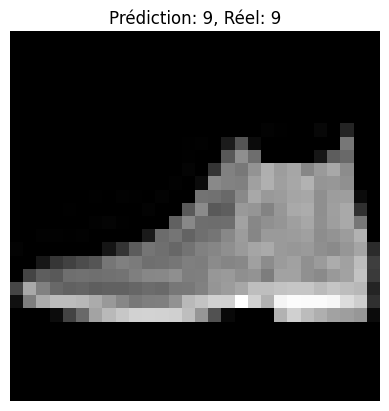

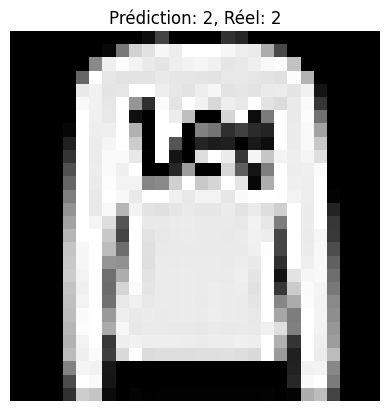

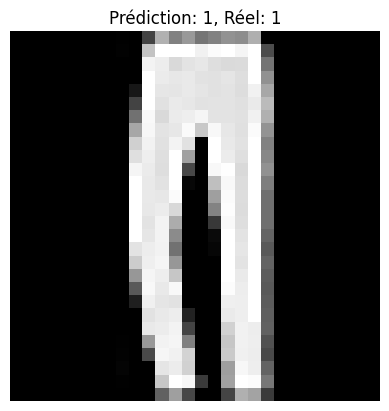

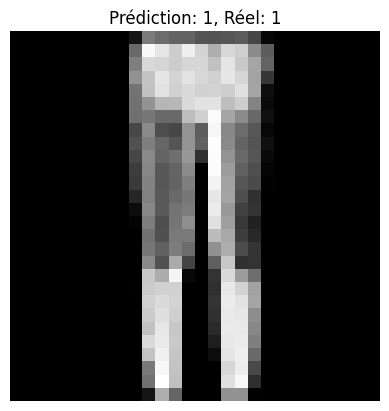

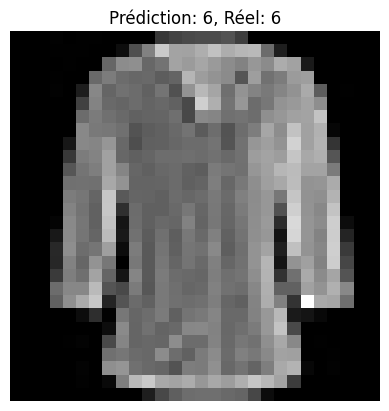

In [10]:
predictions = model.predict(x_test)

# Visualiser quelques images et leurs prédictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Prédiction: {np.argmax(predictions[i])}, Réel: {np.argmax(y_test[i])}")
    plt.axis('off')
    plt.show()


# part 2

In [12]:
# Train the model on the original dataset
history_original = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test)
)

# Get accuracy on the test set
accuracy_original = model.evaluate(x_test, y_test, verbose=0)[1]
print("Test accuracy on original dataset:", accuracy_original)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9428 - loss: 0.1580 - val_accuracy: 0.9088 - val_loss: 0.2747
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9528 - loss: 0.1294 - val_accuracy: 0.9118 - val_loss: 0.2654
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9578 - loss: 0.1140 - val_accuracy: 0.9107 - val_loss: 0.2831
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9647 - loss: 0.0950 - val_accuracy: 0.9163 - val_loss: 0.2844
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.9687 - loss: 0.0850 - val_accuracy: 0.9112 - val_loss: 0.3069
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9749 - loss: 0.0701 - val_accuracy: 0.9083 - val_loss: 0.3393
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9765 - loss: 0.0637 - val_accuracy: 0.9121 - val_loss: 0.3505
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9798 -

In [13]:
aug_model = Sequential()
# Couche de convolution
aug_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))   # Rectified Linear Unit

# Pooling
aug_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten
aug_model.add(Flatten())

# Couche entièrement connectée
aug_model.add(Dense(128, activation='relu'))

# Couche de sortie
aug_model.add(Dense(10, activation='softmax'))

aug_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.1
)

# Fit the generator on the training data
datagen.fit(x_train)

# Re-train the model on the augmented data
history_augmented = aug_model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(x_test, y_test)
)

# Get accuracy on the test set
accuracy_augmented = aug_model.evaluate(x_test, y_test, verbose=0)[1]
print("Test accuracy on augmented dataset:", accuracy_augmented)


Epoch 1/10
   3/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.1580 - loss: 2.2548

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.7111 - loss: 0.7785 - val_accuracy: 0.8458 - val_loss: 0.4309
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.8255 - loss: 0.4710 - val_accuracy: 0.8597 - val_loss: 0.3842
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.8372 - loss: 0.4332 - val_accuracy: 0.8744 - val_loss: 0.3469
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.8517 - loss: 0.3993 - val_accuracy: 0.8767 - val_loss: 0.3404
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.8583 - loss: 0.3779 - val_accuracy: 0.8653 - val_loss: 0.3514
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.8664 - loss: 0.3621 - val_accuracy: 0.8820 - val_loss: 0.3223
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.8664 - loss: 0.3563 - val_accuracy: 0.8847 - val_loss: 0.3219
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.8710 - loss: 0.34

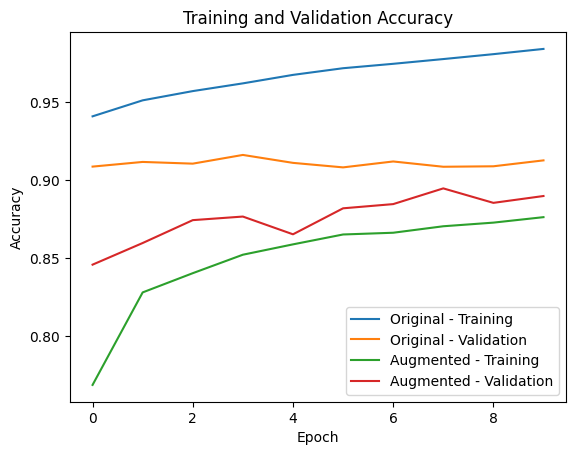

In [15]:
import matplotlib.pyplot as plt

# Plot training accuracy
plt.plot(history_original.history['accuracy'], label='Original - Training')
plt.plot(history_original.history['val_accuracy'], label='Original - Validation')
plt.plot(history_augmented.history['accuracy'], label='Augmented - Training')
plt.plot(history_augmented.history['val_accuracy'], label='Augmented - Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [16]:
model2 = Sequential()

# 1- convolution layer
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))   # Rectified Linear Unit
# 2- normalization layer
model2.add(BatchNormalization())
# 3- convolution layer
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 4- normalization layer
model2.add(BatchNormalization())
# 5- Pooling
model2.add(MaxPooling2D(pool_size=(2, 2)))
# 6- dropout
model2.add(Dropout(0.25))

# 7- convolution layer
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 8- normalization layer
model2.add(BatchNormalization())
# 9- dropout
model2.add(Dropout(0.25))

# 10- convolution layer
model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 11- normalization layer
model2.add(BatchNormalization())
# 12- Pooling
model2.add(MaxPooling2D(pool_size=(2, 2)))
# 13- dropout
model2.add(Dropout(0.25))

# 14- Flatten
model2.add(Flatten())
# 15- Fully Connected Layer
model2.add(Dense(512, activation='relu'))
# 16- normalization layer
model2.add(BatchNormalization())
# 17- dropout
model2.add(Dropout(0.05))

# 18- Fully Connected Layer
model2.add(Dense(128, activation='relu'))
# 19- normalization layer
model2.add(BatchNormalization())
# 20- dropout
model2.add(Dropout(0.05))

# 21-Couche de sortie
model2.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [18]:
# Train the new model on the original dataset
history_original_new = model2.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test)
)

# Get accuracy on the test set
accuracy_original_new = model2.evaluate(x_test, y_test, verbose=0)[1]
print("Test accuracy of new CNN on original dataset:", accuracy_original_new)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 226s 117ms/step - accuracy: 0.7888 - loss: 0.5883 - val_accuracy: 0.8831 - val_loss: 0.3107
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 259s 115ms/step - accuracy: 0.8808 - loss: 0.3273 - val_accuracy: 0.8985 - val_loss: 0.2763
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 262s 116ms/step - accuracy: 0.9008 - loss: 0.2748 - val_accuracy: 0.9056 - val_loss: 0.2533
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 264s 117ms/step - accuracy: 0.9063 - loss: 0.2536 - val_accuracy: 0.9024 - val_loss: 0.2748
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 263s 117ms/step - accuracy: 0.9153 - loss: 0.2307 - val_accuracy: 0.8994 - val_loss: 0.2694
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 261s 117ms/step - accuracy: 0.9207 - loss: 0.2123 - val_accuracy: 0.9214 - val_loss: 0.2167
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 264s 118ms/step - accuracy: 0.9252 - loss: 0.1991 - val_accuracy: 0.9242 - val_loss: 0.2151
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 260s 117ms/step - ac

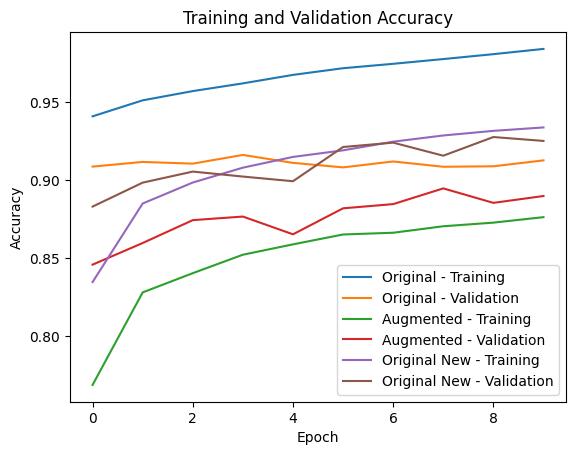

In [19]:
plt.plot(history_original.history['accuracy'], label='Original - Training')
plt.plot(history_original.history['val_accuracy'], label='Original - Validation')
plt.plot(history_augmented.history['accuracy'], label='Augmented - Training')
plt.plot(history_augmented.history['val_accuracy'], label='Augmented - Validation')
plt.plot(history_original_new.history['accuracy'], label='Original New - Training')
plt.plot(history_original_new.history['val_accuracy'], label='Original New - Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# part 3


In [21]:
# Save the original CNN model
model.save('/content/drive/MyDrive/Master2/MLCI TP3/origin_cnn_model.h5')
aug_model.save('/content/drive/MyDrive/Master2/MLCI TP3/augmented_cnn_model.h5')
model2.save('/content/drive/MyDrive/Master2/MLCI TP3/cnn2_model.h5')
print("Models saved successfully.")


Models saved successfully.


In [20]:
save_model(model, '/content/drive/MyDrive/Master2/MLCI TP3/origin_cnn_model.keras')
save_model(aug_model, '/content/drive/MyDrive/Master2/MLCI TP3/augmented_cnn_model.keras')
save_model(model2, '/content/drive/MyDrive/Master2/MLCI TP3/cnn2_model.keras')
print("Models saved successfully.")
#/content/drive/MyDrive/Master2/MLCI TP3/fashion-mnist_test.csv

Models saved successfully.


In [33]:
from PIL import Image
import numpy as np

def preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels

    # Convert to numpy array and normalize
    img_array = np.array(img) / 255.0  # Scale pixel values to [0, 1]

    # Invert colors
    img_array = 1 - img_array  # White becomes black, black becomes white

    # Reshape to match the input shape of the CNN (28, 28, 1)
    img_array = img_array.reshape((28, 28, 1))

    return img_array


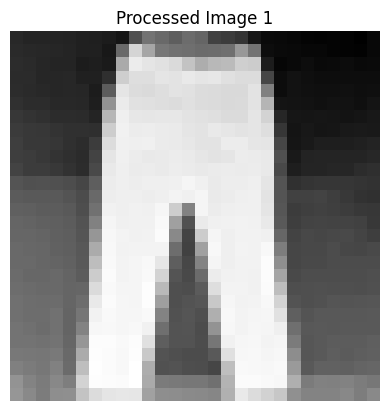

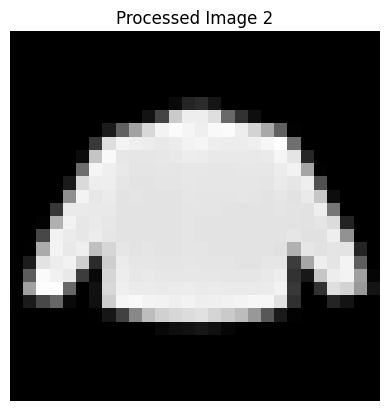

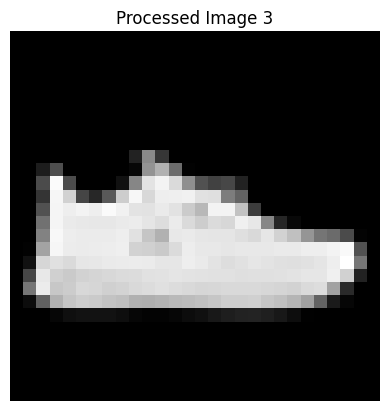

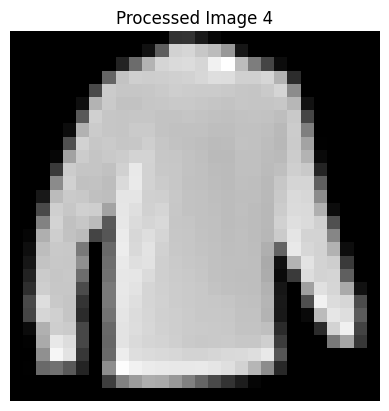

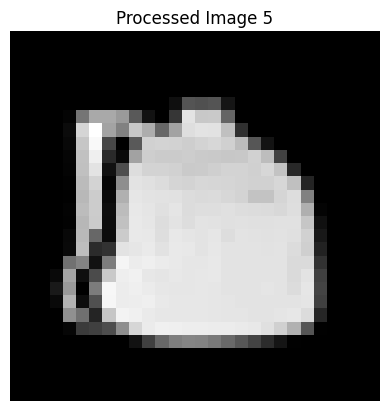

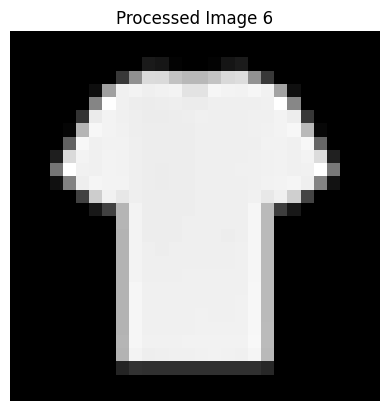

In [39]:
# Paths to the downloaded images
image_paths = ['/pant.jpeg', '/shirt.jpeg', '/shoe.jpeg', '/hoddie.jpeg', '/bag.jpeg','/t-shirt.jpeg']

# Preprocess each image and store in a list
processed_images = [preprocess_image(path) for path in image_paths]

# Display the processed images
for i, img_array in enumerate(processed_images):
    plt.figure()
    plt.imshow(img_array.reshape(28, 28), cmap='gray')
    plt.title(f"Processed Image {i+1}")
    plt.axis('off')  # Turn off axis for a cleaner look
    plt.show()



In [41]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/Master2/MLCI TP3/cnn2_model.keras')
print("Model loaded successfully.")


Model loaded successfully.


In [42]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Predict classes for each preprocessed image
images = np.array(processed_images)
predictions = loaded_model.predict(images)

# Display the class for each image
for i, pred in enumerate(predictions):
    class_index = np.argmax(pred)  # Get the index of the class with the highest probability
    print(f"Image {i+1} predicted class: {class_names[class_index]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
Image 1 predicted class: Trouser
Image 2 predicted class: Bag
Image 3 predicted class: Sneaker
Image 4 predicted class: Pullover
Image 5 predicted class: Bag
Image 6 predicted class: T-shirt/top
